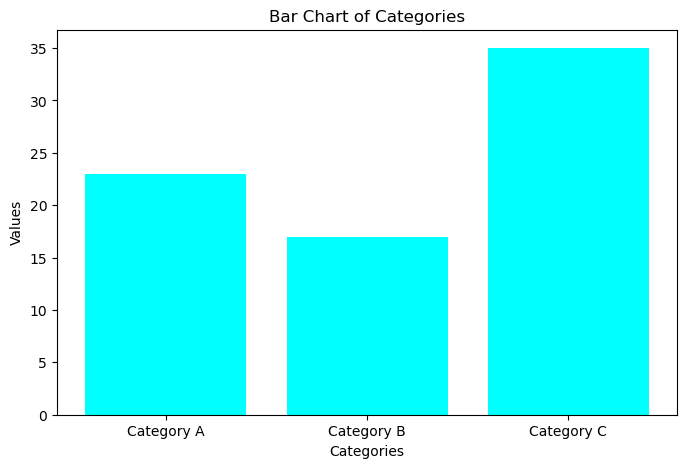

In [1]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


In [2]:
!pip install seaborn


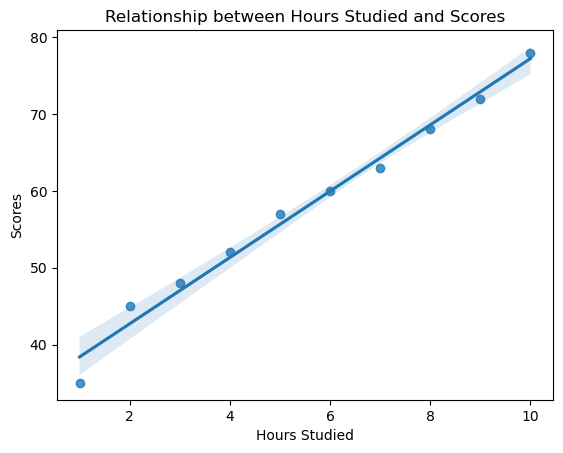

In [3]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/nadhifa/Downloads/archive/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 800x500 with 0 Axes>

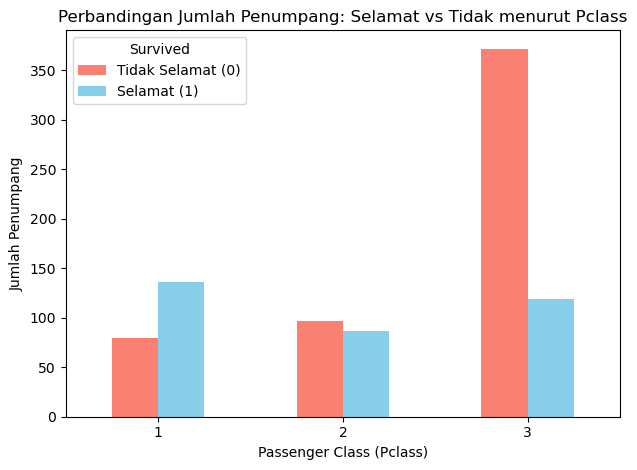

In [10]:
# Multi-bar: jumlah penumpang selamat vs tidak menurut kelas (Pclass)
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
survival_by_class.plot(kind='bar', color=['salmon','skyblue'], rot=0)
plt.title("Perbandingan Jumlah Penumpang: Selamat vs Tidak menurut Pclass")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Jumlah Penumpang")
plt.legend(["Tidak Selamat (0)","Selamat (1)"], title="Survived")
plt.tight_layout()
plt.show()


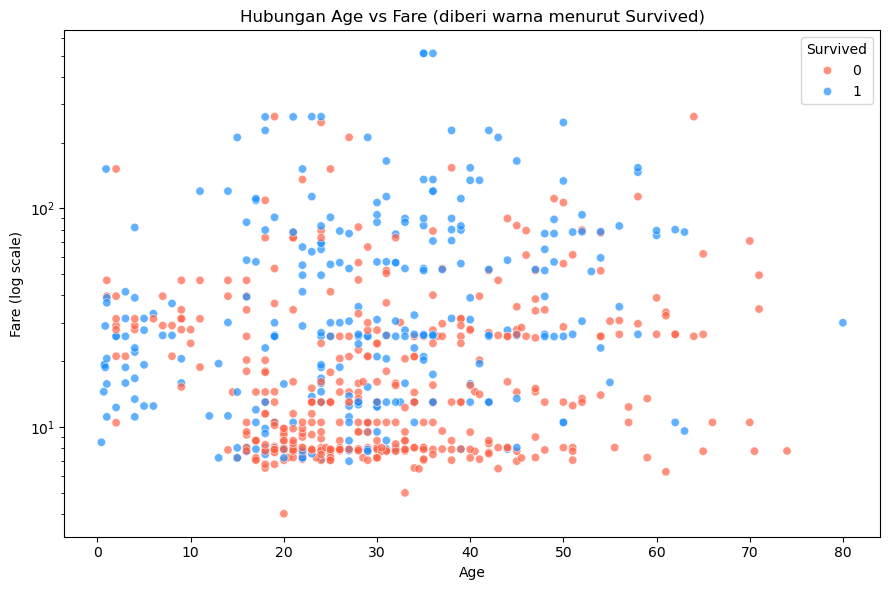

In [11]:
# Generate scatter plots with Seaborn to explore relationships between variables in a dataset.

plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette={0:'tomato',1:'dodgerblue'}, alpha=0.7)
plt.yscale('log')  # opsional: log untuk menampilkan skala Fare yang skewed
plt.title('Hubungan Age vs Fare (diberi warna menurut Survived)')
plt.xlabel('Age')
plt.ylabel('Fare (log scale)')
plt.legend(title='Survived')
plt.tight_layout()
plt.show()


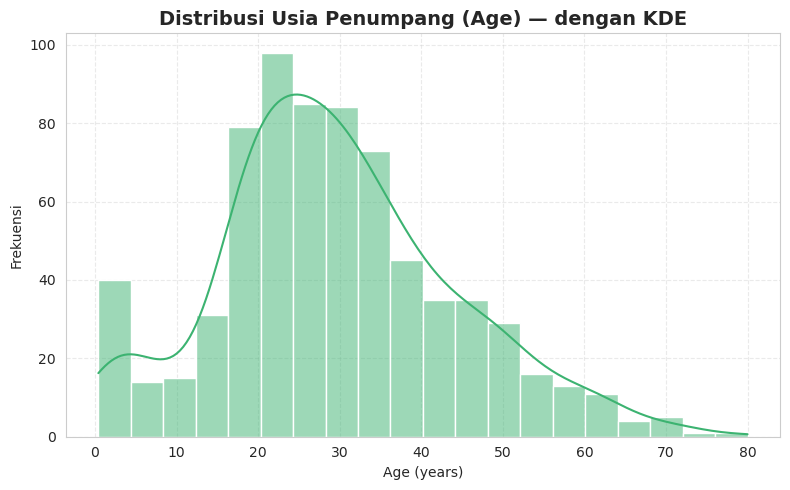

In [12]:
# Customize plot layouts and color schemes.

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.histplot(df['Age'], bins=20, kde=True, color='mediumseagreen')
plt.title("Distribusi Usia Penumpang (Age) — dengan KDE", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4188/3649812298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['salmon','skyblue'], ax=axA)
/tmp/ipykernel_4188/3649812298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=pclass_surv, palette='viridis', ax=axB)
/tmp/ipykernel_4188/3649812298.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=sex_surv, palette='pastel', ax=axC)
/tmp/ipykernel_4188/3649812298.py:31: FutureWarning: 

Passing `palette` without assigning `hue` i

ValueError: Could not interpret value `FamilySize` for `x`. An entry with this name does not appear in `data`.

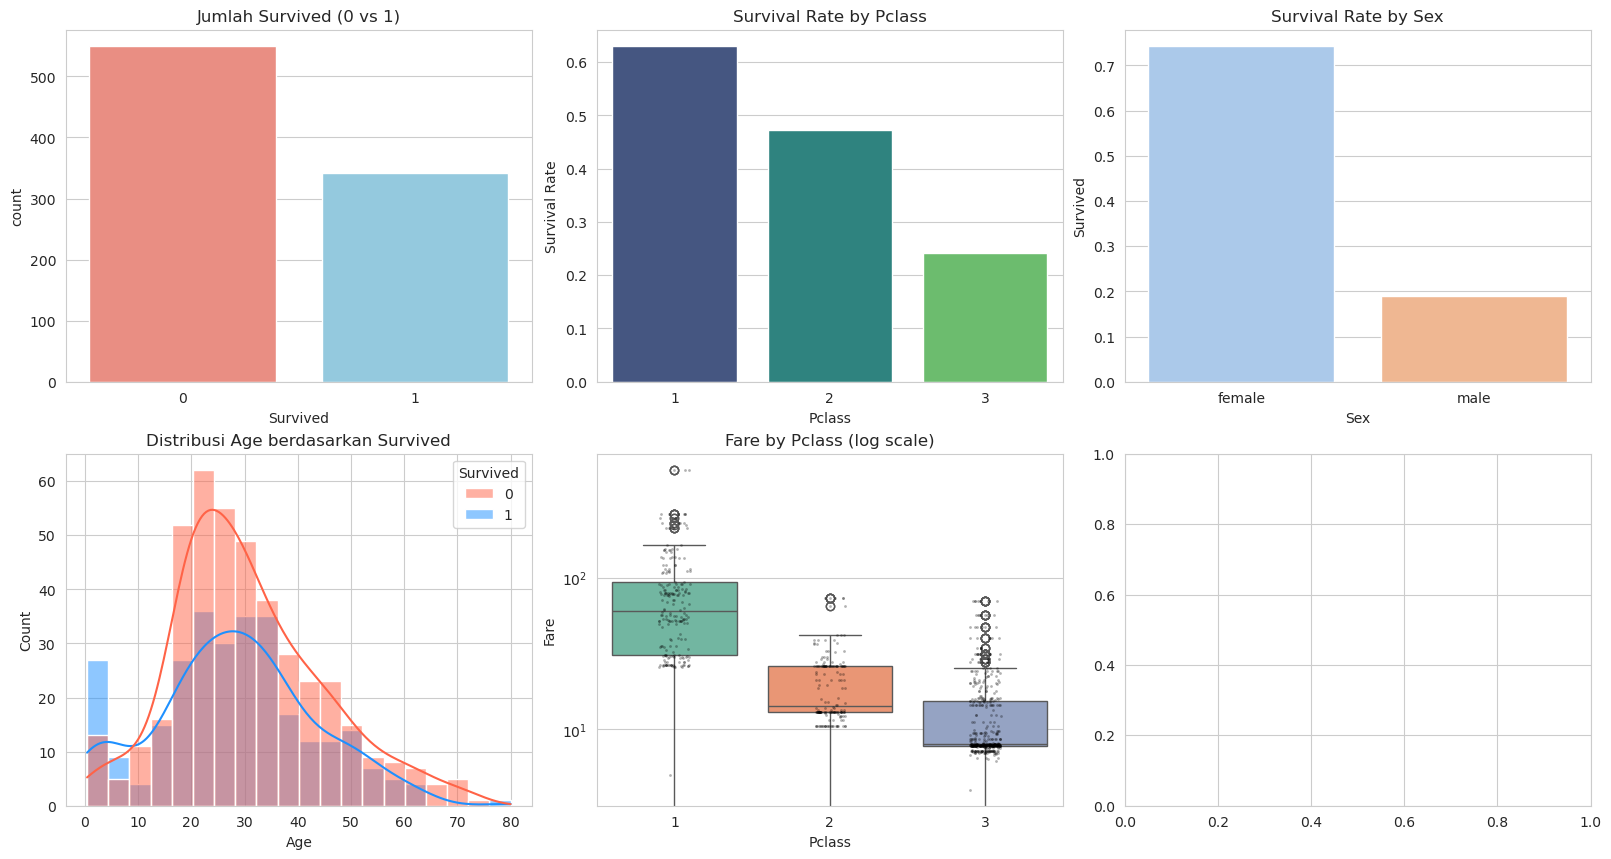

In [13]:
# Dashboard: beberapa plot dalam satu figure
sns.set_style("whitegrid")
fig = plt.figure(constrained_layout=True, figsize=(16,12))
gs = fig.add_gridspec(3, 3)

# A: Survived counts
axA = fig.add_subplot(gs[0,0])
sns.countplot(data=df, x='Survived', palette=['salmon','skyblue'], ax=axA)
axA.set_title('Jumlah Survived (0 vs 1)')

# B: Survival rate by Pclass
axB = fig.add_subplot(gs[0,1])
pclass_surv = df.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=pclass_surv, palette='viridis', ax=axB)
axB.set_title('Survival Rate by Pclass')
axB.set_ylabel('Survival Rate')

# C: Survival rate by Sex
axC = fig.add_subplot(gs[0,2])
sex_surv = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(x='Sex', y='Survived', data=sex_surv, palette='pastel', ax=axC)
axC.set_title('Survival Rate by Sex')

# D: Age distribution by Survived
axD = fig.add_subplot(gs[1,0])
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette={0:'tomato',1:'dodgerblue'}, ax=axD)
axD.set_title('Distribusi Age berdasarkan Survived')

# E: Fare by Pclass (box + strip)
axE = fig.add_subplot(gs[1,1])
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2', ax=axE)
sns.stripplot(x='Pclass', y='Fare', data=df, color='k', size=2, alpha=0.3, ax=axE)
axE.set_yscale('log')
axE.set_title('Fare by Pclass (log scale)')

# F: FamilySize vs Survival
axF = fig.add_subplot(gs[1,2])
sns.countplot(x='FamilySize', hue='Survived', data=df, palette={0:'lightcoral',1:'lightseagreen'}, ax=axF)
axF.set_title('FamilySize vs Survived')

# G: Age vs Fare scatter
axG = fig.add_subplot(gs[2, 0:2])
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette={0:'tomato',1:'dodgerblue'}, alpha=0.6, ax=axG)
axG.set_yscale('log')
axG.set_title('Age vs Fare (color = Survived)')

# H: Correlation heatmap
axH = fig.add_subplot(gs[2,2])
num_cols = [c for c in ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize','IsAlone'] if c in df.columns]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=axH)
axH.set_title('Korelasi fitur numerik')

plt.suptitle('Titanic Dashboard — Distribusi & Hubungan Fitur (Setelah Cleaning)', fontsize=16)
plt.show()
